In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import random
import Cooking

COOKED_DATA_DIR = 'EndToEndLearningRawData/data_cooked/'

RAW_DATA_DIR = 'EndToEndLearningRawData/data_raw/'


DATA_FOLDERS = ['normal_1', 'normal_2', 'normal_3', 'normal_4', 'normal_5', 'normal_6', 'swerve_1', 'swerve_2', 'swerve_3']


FIGURE_SIZE = (10,10)

In [4]:
sample_tsv_path = os.path.join(RAW_DATA_DIR, 'normal_1/airsim_rec.txt')
sample_tsv = pd.read_csv(sample_tsv_path, sep='\t')
sample_tsv.head()

,Timestamp,Speed (kmph),Throttle,Steering,Brake,Gear,ImageName
0,93683464,0,0.0,0.000000,0.0,N,img_0.png
1,93689595,0,0.0,0.000000,0.0,N,img_1.png
2,93689624,0,0.0,-0.035522,0.0,N,img_2.png
3,93689624,0,0.0,-0.035522,0.0,N,img_3.png
4,93689624,0,0.0,-0.035522,0.0,N,img_4.png


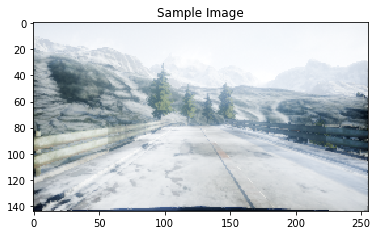

In [5]:
sample_image_path = os.path.join(RAW_DATA_DIR, 'normal_1/images/img_0.png')
sample_image = Image.open(sample_image_path)
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()

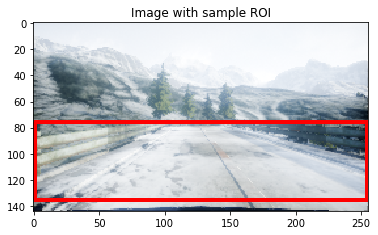

In [6]:
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
points = [(1,76), (1,135), (255,135), (255,76)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=3)
del draw

plt.title('Image with sample ROI')
plt.imshow(sample_image_roi)
plt.show()

In [7]:
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

dataframes = []
for folder in full_path_raw_folders:
    current_dataframe = pd.read_csv(os.path.join(folder, 'airsim_rec.txt'), sep='\t')
    current_dataframe['Folder'] = folder
    dataframes.append(current_dataframe)
    
dataset = pd.concat(dataframes, axis=0)

print('Number of data points: {0}'.format(dataset.shape[0]))

dataset.head()

Number of data points: 46738


,Timestamp,Speed (kmph),Throttle,Steering,Brake,Gear,ImageName,Folder
0,93683464,0,0.0,0.000000,0.0,N,img_0.png,EndToEndLearningRawData/data_raw/normal_1
1,93689595,0,0.0,0.000000,0.0,N,img_1.png,EndToEndLearningRawData/data_raw/normal_1
2,93689624,0,0.0,-0.035522,0.0,N,img_2.png,EndToEndLearningRawData/data_raw/normal_1
3,93689624,0,0.0,-0.035522,0.0,N,img_3.png,EndToEndLearningRawData/data_raw/normal_1
4,93689624,0,0.0,-0.035522,0.0,N,img_4.png,EndToEndLearningRawData/data_raw/normal_1


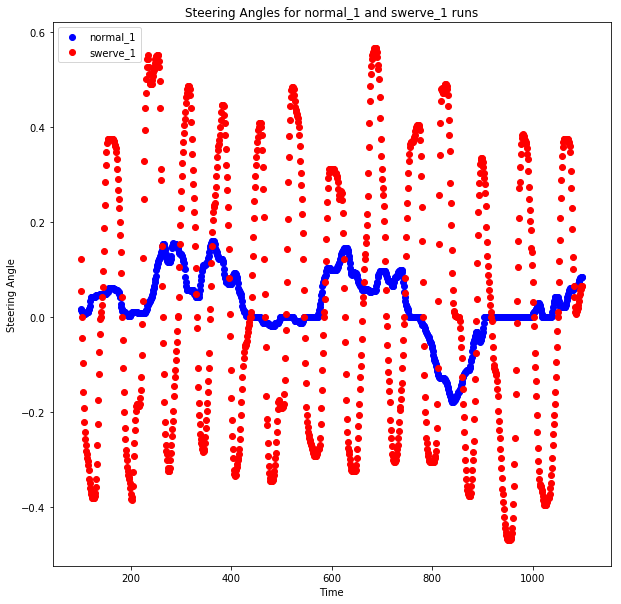

In [8]:
min_index = 100
max_index = 1100
steering_angles_normal_1 = dataset[dataset['Folder'].apply(lambda v: 'normal_1' in v)]['Steering'][min_index:max_index]
steering_angles_swerve_1 = dataset[dataset['Folder'].apply(lambda v: 'swerve_1' in v)]['Steering'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index, 1)]

fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)

ax1.scatter(plot_index, steering_angles_normal_1, c='b', marker='o', label='normal_1')
ax1.scatter(plot_index, steering_angles_swerve_1, c='r', marker='o', label='swerve_1')
plt.legend(loc='upper left');
plt.title('Steering Angles for normal_1 and swerve_1 runs')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

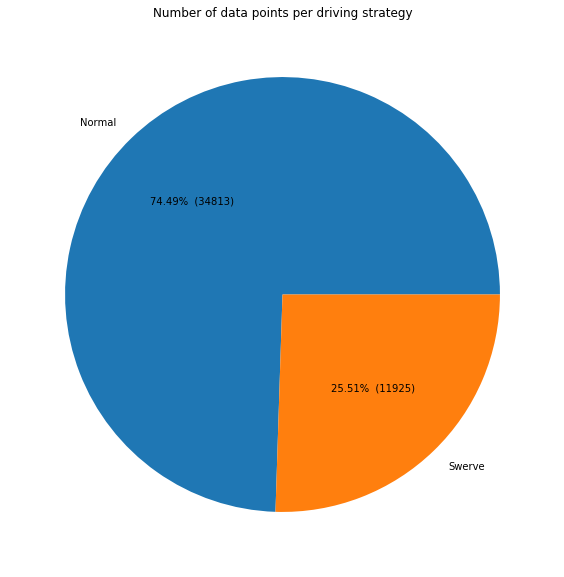

In [9]:

dataset['Is Swerve'] = dataset.apply(lambda r: 'swerve' in r['Folder'], axis=1)
grouped = dataset.groupby(by=['Is Swerve']).size().reset_index()
grouped.columns = ['Is Swerve', 'Count']

def make_autopct(values):
    def my_autopct(percent):
        total = sum(values)
        val = int(round(percent*total/100.0))
        return '{0:.2f}%  ({1:d})'.format(percent,val)
    return my_autopct

pie_labels = ['Normal', 'Swerve']
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.pie(grouped['Count'], labels=pie_labels, autopct = make_autopct(grouped['Count']))
plt.title('Number of data points per driving strategy')
plt.show()

In [11]:
bins = np.arange(-1, 1.05, 0.05)
normal_labels = dataset[dataset['Is Swerve'] == False]['Steering']
swerve_labels = dataset[dataset['Is Swerve'] == True]['Steering']

def steering_histogram(hist_labels, title, color):
    plt.figure(figsize=FIGURE_SIZE)
    n, b, p = plt.hist(hist_labels.to_numpy(), bins, facecolor=color)
    plt.xlabel('Steering Angle')
    plt.ylabel('Normalized Frequency')
    plt.title(title)
    plt.show()

#steering_histogram(normal_labels, 'Normal label distribution', 'g')
#steering_histogram(swerve_labels, 'Swerve label distribution', 'r')

In [12]:
train_eval_test_split = [0.7, 0.2, 0.1]
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

In [13]:
#creating the h5 files to be loaded by keras. 
Cooking.cook(full_path_raw_folders, COOKED_DATA_DIR, train_eval_test_split)

Reading data from EndToEndLearningRawData/data_raw/normal_1...
Reading data from EndToEndLearningRawData/data_raw/normal_2...
Reading data from EndToEndLearningRawData/data_raw/normal_3...
Reading data from EndToEndLearningRawData/data_raw/normal_4...
Reading data from EndToEndLearningRawData/data_raw/normal_5...
Reading data from EndToEndLearningRawData/data_raw/normal_6...
Reading data from EndToEndLearningRawData/data_raw/swerve_1...
Reading data from EndToEndLearningRawData/data_raw/swerve_2...
Reading data from EndToEndLearningRawData/data_raw/swerve_3...
Processing EndToEndLearningRawData/data_cooked/train.h5...
Finished saving EndToEndLearningRawData/data_cooked/train.h5.
Processing EndToEndLearningRawData/data_cooked/eval.h5...
Finished saving EndToEndLearningRawData/data_cooked/eval.h5.
Processing EndToEndLearningRawData/data_cooked/test.h5...
Finished saving EndToEndLearningRawData/data_cooked/test.h5.
